### Логнормальное распределение

In [323]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import beta
import math

In [324]:
%matplotlib inline

Для данного задания я буду рассматривать логнормальное распределение с sigma = 1 и mu = 0.

Сгенерируем выборку объема 1000.

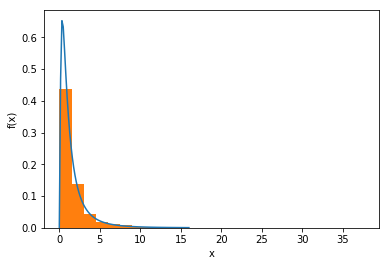

In [330]:
rv = sts.lognorm(s = 1, scale = math.exp(0))
sample = rv.rvs(1000)

x = np.linspace(0, 16, 100)
pdf = rv.pdf(x)

#строим гистограмму выборки
#и оценку плотности вероятности логнормального распределения
plt.plot(x, pdf)
plt.hist(sample, bins = 25, density = True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

На графике видно, что гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.

Оценим распределение выборочных средних случайной величины. Согласно цетральной теореме выборочные средние будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ - математическое ожидание и $\mathbb{D}X$ - дисперсия рассматриваемого исходного распределения.

Рассчитаем $\mathbb{E}X$ и $\mathbb{D}X$. Для логнормального распределения математическое ожидание $e^{{\mu +\sigma ^{2}/2}}$ = 1.65, а дисперсия $(e^{{\sigma ^{2}}}\!\!-1)e^{{2\mu +\sigma ^{2}}}$ = 4.67.

In [329]:
def generate(n): 
    average = []
    for _ in range(1000):
        #генерируем выборочные средние
        sample = rv.rvs(n)
        average.append(np.mean(sample))
    
    #расчитываем теоретическую плотность вероятность для нормального распределения
    mu = 1.65
    sigma = (4.67/n) ** 0.5
    norm_rv = sts.norm(loc = mu, scale = sigma)
    x = np.linspace(0, 16, 100)
    pdf = norm_rv.pdf(x)
    
    #строим график гистограммы и плотности
    plt.plot(x, pdf)
    plt.hist(average, density = True)
    plt.title('n = %d' % n)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.show()

Эта функция будет для объема выборки n генерировать график гистограммы выборочных средних случайной величины и график теоретической оценки плотности вероятности для распределения выборочных средних.

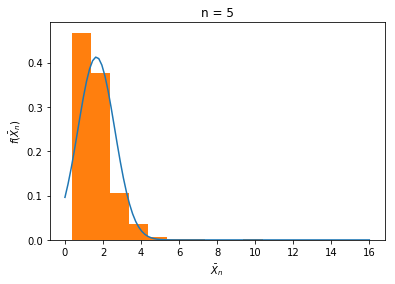

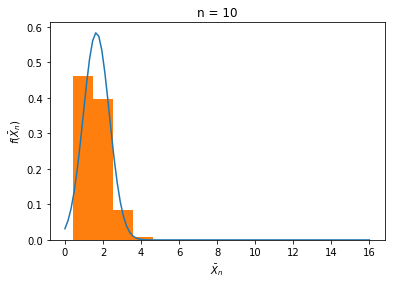

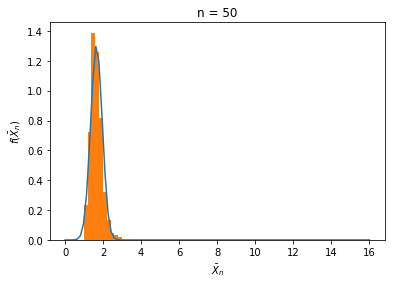

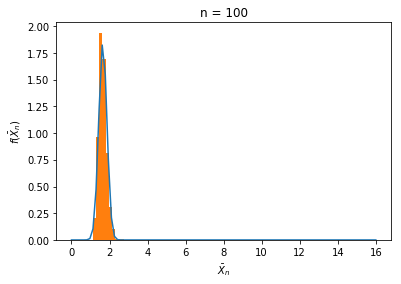

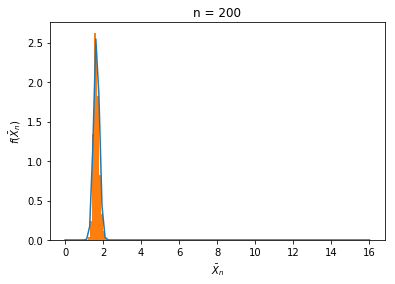

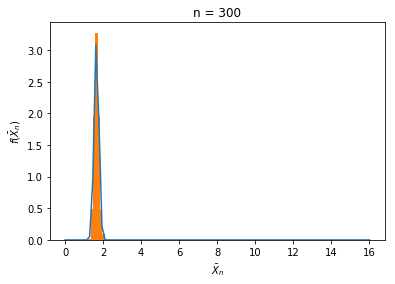

In [328]:
for n in [5, 10, 50, 100, 200, 300]:
    generate_pdf(n)

Из графиков видно, что чем больше объем выборки, тем более гладкой становится гистограмма, тем больше она приближается к нормальной. При n = 5 распределение совсем не похоже на нормальное, начиная с n = 100, распределение выборочных уже начинает хорошо соответствовать нормальному.